In [37]:
import math
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt

# Варіант 12 -> 30

## №1

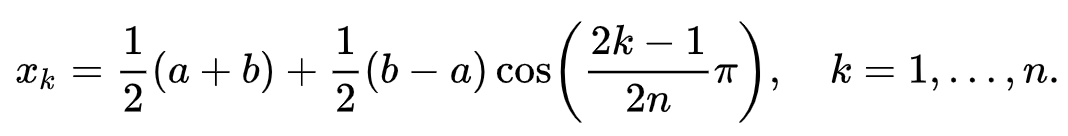

In [38]:
def chebishef_nodes(n, a, b):
  nodes = []
  for k in range(1, n + 1):
    nodes.append((0.5*(a + b))+((0.5*(b - a))*math.cos((((2*k)-1)*math.pi)/(2*n))))
  return nodes

X = sorted(chebishef_nodes(5, -30, 31))
print(X)

[-28.507223747002183, -17.42745019492043, 0.5000000000000019, 18.427450194920432, 29.507223747002183]


In [39]:
y = [1, 3, 4, 2, 0]
df = pd.DataFrame({'X': X, 'Y': y})
df

,X,Y
0,-28.507224,1
1,-17.427450,3
2,0.500000,4
3,18.427450,2
4,29.507224,0


In [40]:
x = sp.Symbol('x')
L = 0
for i in range(len(y)):
  nominator = y[i]
  for j in range(len(y)):
    if j != i:
      nominator *= (x - X[j])
  denominator = 1
  for j in range(len(y)):
    if j != i:
      denominator *= (X[i] - X[j])
  L += (nominator / denominator)
L = sp.simplify(L)
print(L)

9.75984019461932e-7*x**4 + 1.85337650366828e-5*x**3 - 0.00501011585067425*x**2 - 0.0294784437516135*x + 4.01598937311885


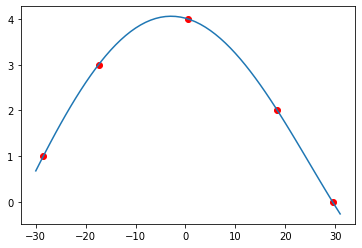

In [41]:
plt.scatter(X, y, color="red")
plt.plot([i for i in range(-30, 32)], [L.subs(x, i) for i in range(-30, 32)])
plt.show()

## №2

In [42]:
X = [30, 31, 32]
Y = [29, 31, 34]
df = pd.DataFrame({'X': X, 'Y': Y})
df

,X,Y
0,30,29
1,31,31
2,32,34


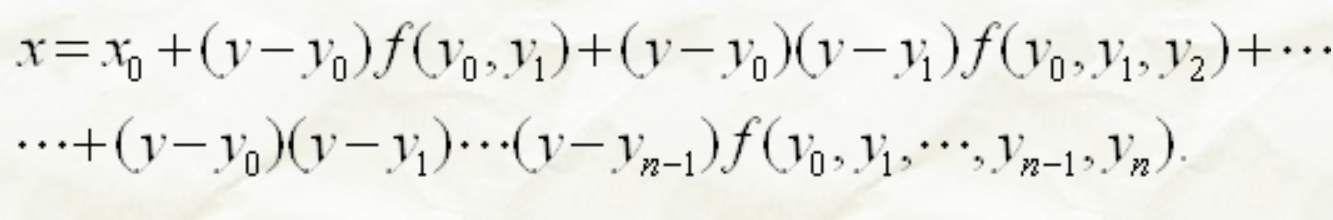

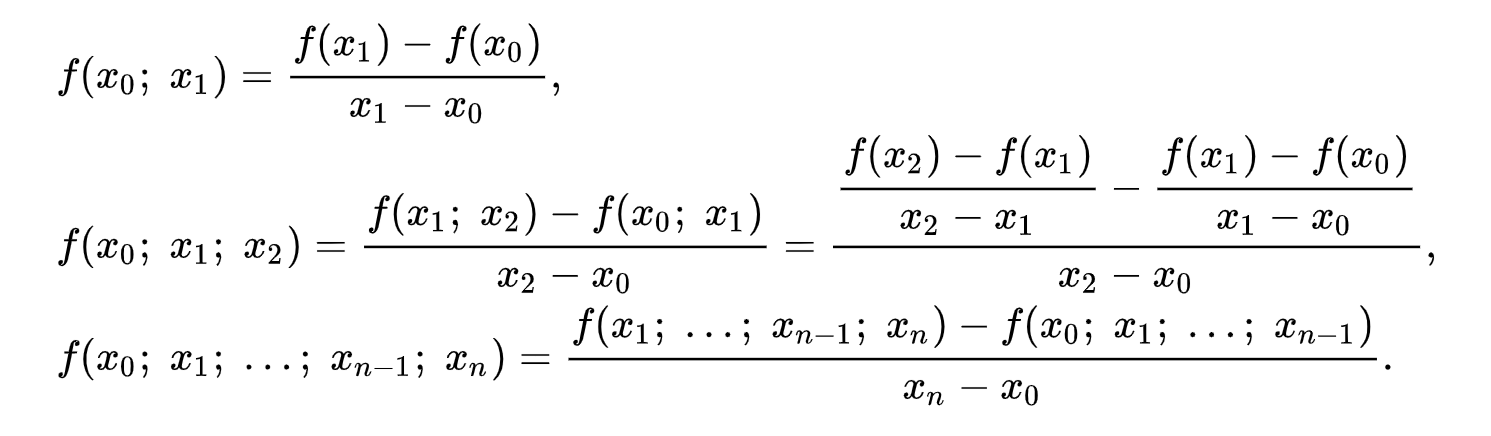

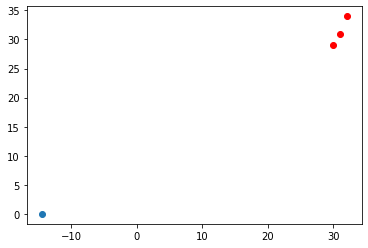

In [45]:
plt.scatter(X, Y, color="red")
plt.scatter([-14.47], [0])
plt.show()

## №3

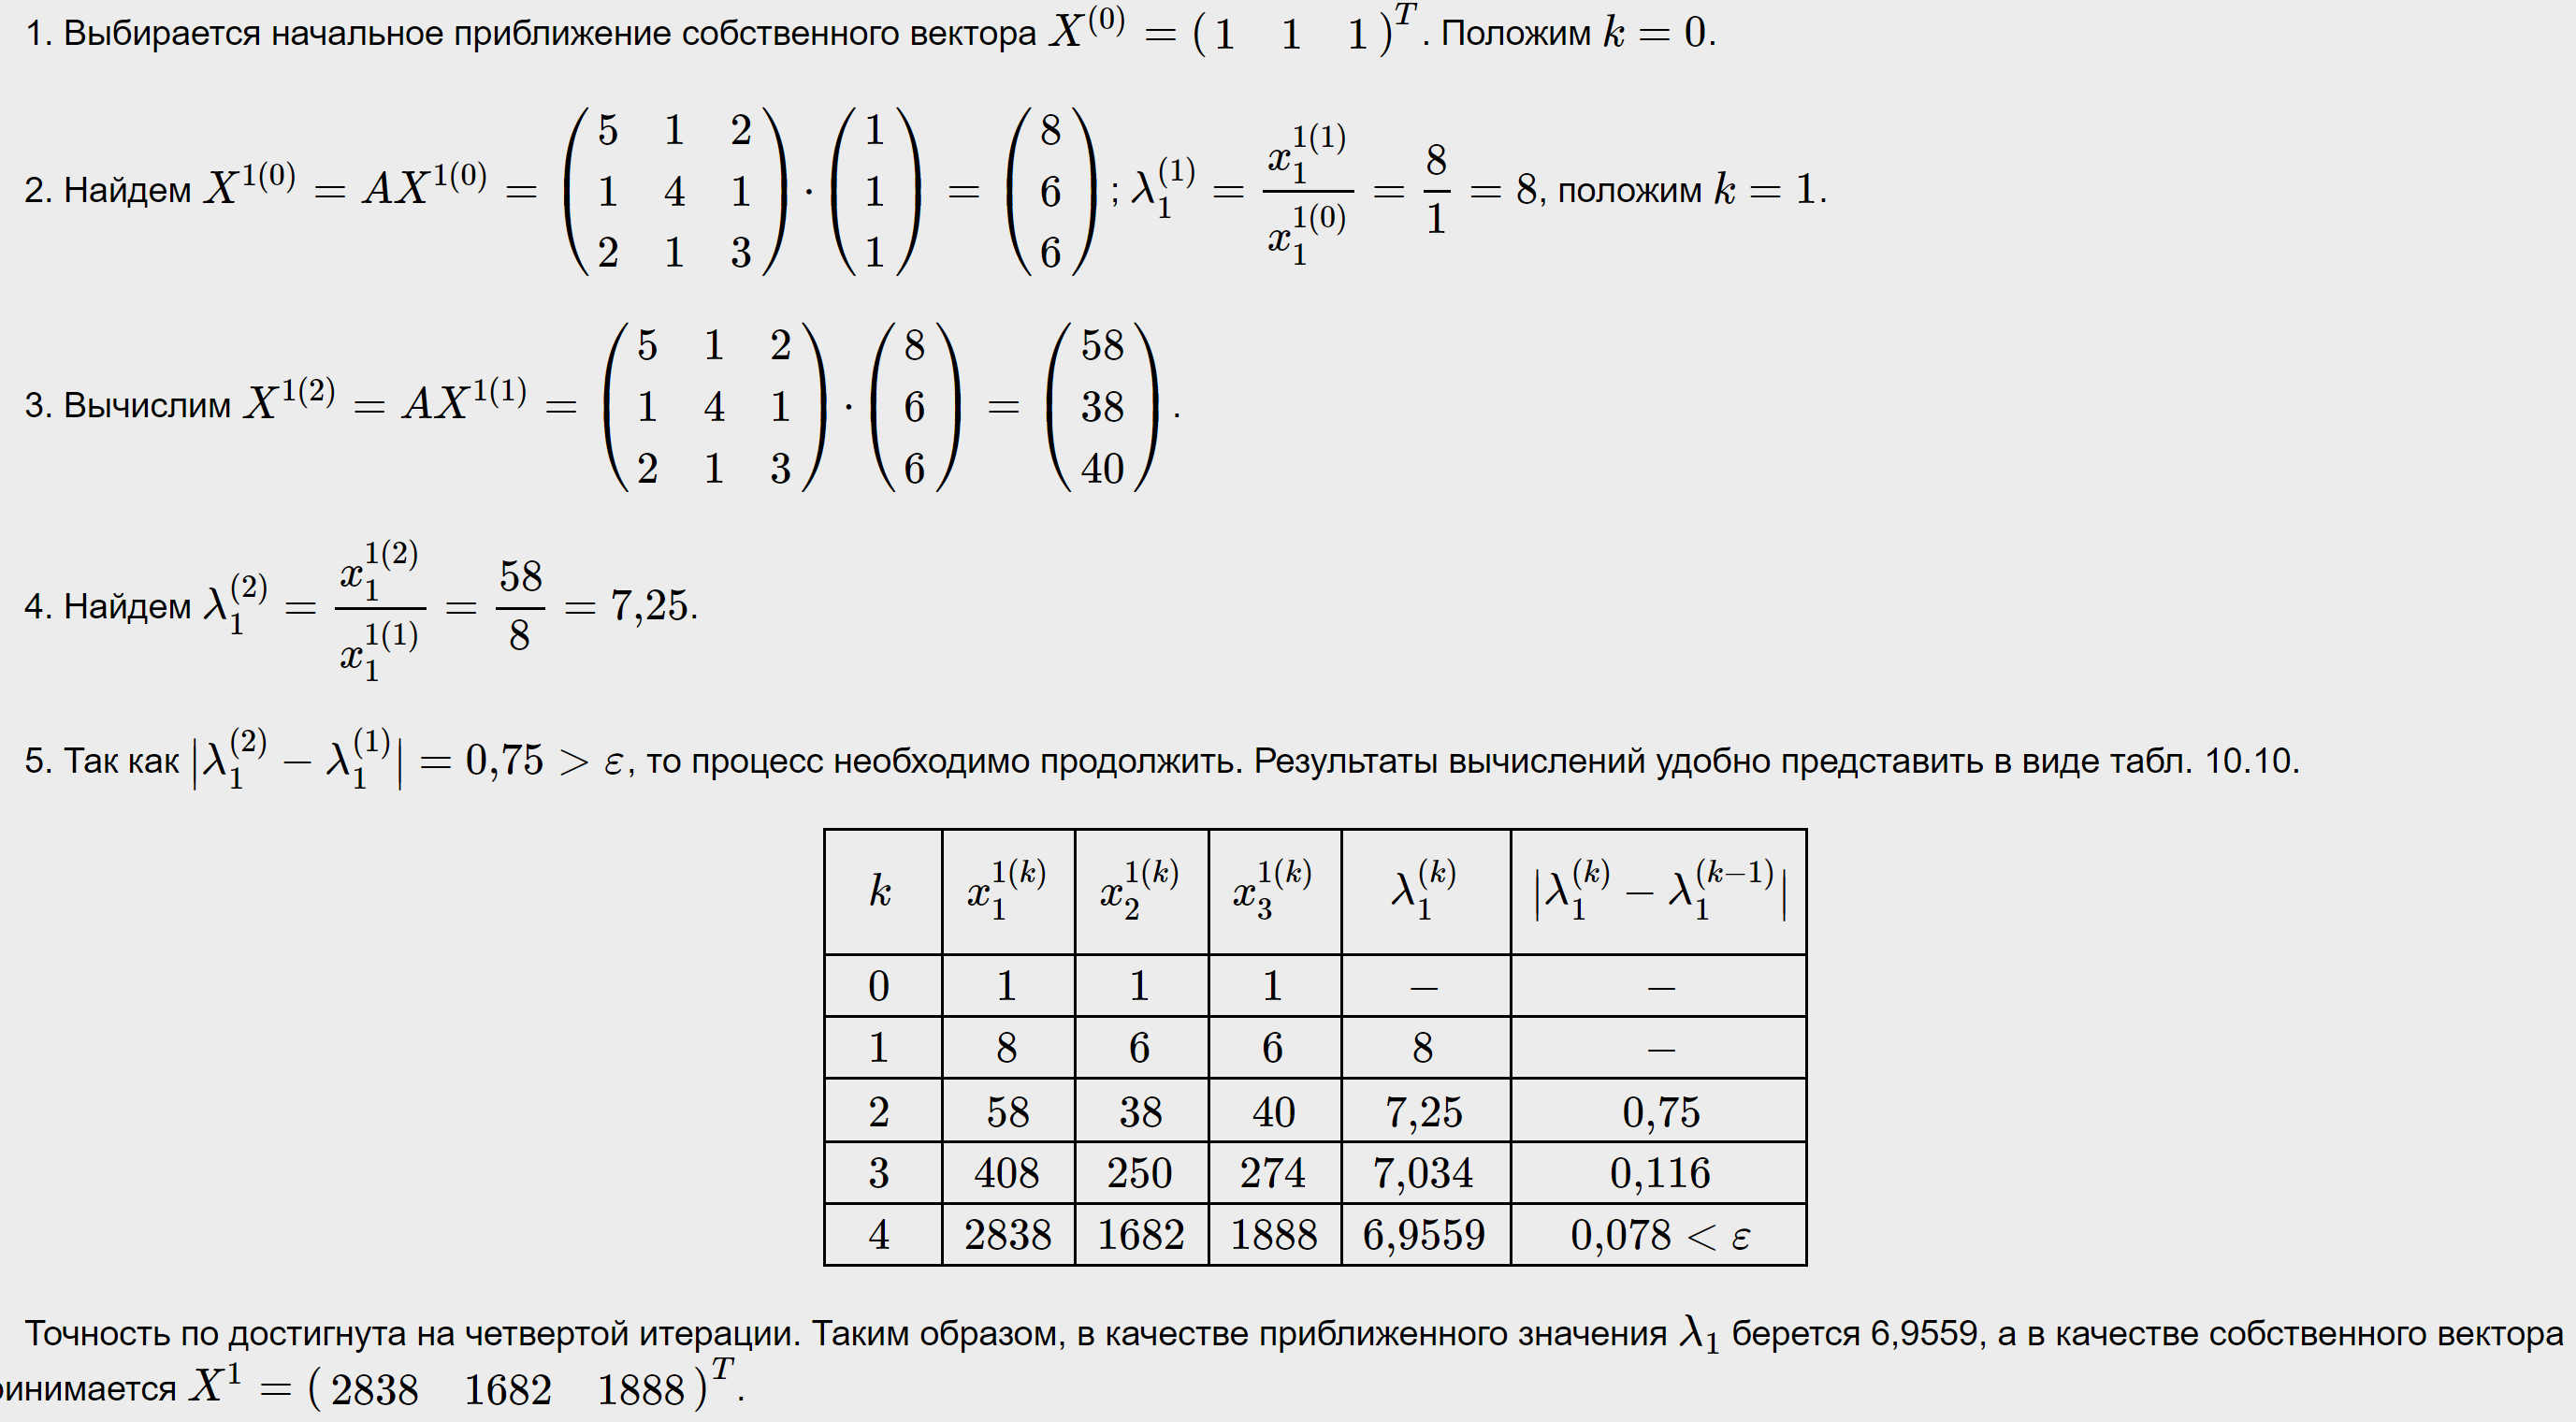

In [50]:
A = np.array([[36, 1, 2], [1, 35, 1], [2, 1, 32]])
print(A)

[[36  1  2]
 [ 1 35  1]
 [ 2  1 32]]


In [59]:
X = [np.array([1, 1, 1]).reshape(-1, 1)]
lamb = []
for k in range(8):
  X.append(A.dot(X[k]))
  lamb.append(X[k + 1][0] / X[k][0])
print(f"Власне значення: {lamb[-1]}")
print(f"Власний вектор:\n{X[-1]}")

Власне значення: [37.9748878]
Власний вектор:
[[4710331347215]
 [3536256014305]
 [2737135512779]]


In [60]:
print(A.dot(X[-1]))
print(lamb[-1]*X[-1])

[[178582455539603]
 [131216427360669]
 [100545255117663]]
[[1.78874304e+14]
 [1.34288925e+14]
 [1.03942414e+14]]


## №4

## №5

In [78]:
A = np.array([[36, 1, 1], [1, 35, 1], [2, 1, 34]], dtype=np.double)
b = np.array([33, 4, 30], dtype=np.double).reshape(-1, 1)
print(A)
print(b)

[[36.  1.  1.]
 [ 1. 35.  1.]
 [ 2.  1. 34.]]
[[33.]
 [ 4.]
 [30.]]


In [79]:
def lu(A):
    n = A.shape[0]
    U = A.copy()
    L = np.eye(n, dtype=np.double)
    for i in range(n):
        factor = U[i + 1:, i] / U[i, i]
        L[i + 1:, i] = factor
        U[i + 1:] -= factor[:, np.newaxis] * U[i]
    return L, U
L, U = lu(A)
print(L)
print(U)

[[1.         0.         0.        ]
 [0.02777778 1.         0.        ]
 [0.05555556 0.02700556 1.        ]]
[[36.          1.          1.        ]
 [ 0.         34.97222222  0.97222222]
 [ 0.          0.         33.91818904]]


In [80]:
def backward_pass1(L, b):
    y = np.zeros_like(b, dtype=np.double)
    n = len(y)
    y[0, 0] = b[0, 0] / L[0, 0]
    for i in range(1, n):
        suma = sum([L[i, j] * y[j, 0] for j in range(i)])
        y[i, 0] = (b[i, 0] - suma) / L[i, i]
    return y

def backward_pass2(U, y):
    x = np.zeros_like(y, dtype=np.double)
    n = len(x)
    x[n - 1, 0] = y[n - 1, 0] / U[n - 1, n - 1]
    for i in range(n - 2, -1, -1):
        suma = sum([U[i, j] * x[j, 0] for j in range(n - 1, i, -1)])
        x[i, 0] = (y[i, 0] - suma) / U[i, i]
    return x

y = backward_pass1(U, b)
print(f"\ny:\n{y}")

x = backward_pass2(L, y)
print(f"\nx:\n{x}")


y:
[[0.91666667]
 [0.11437649]
 [0.88448118]]

x:
[[0.91666667]
 [0.11437649]
 [0.88448118]]


In [81]:
r = np.sum(np.abs(b - A.dot(x)))
print(f"r: {r}")

r: 4.8232527269598044


## №6

In [83]:
A = np.array([[1, 2, 3, 30], [2, 3, 4, 5], [3, 4, 5, 6], [30, 5, 6, 7]])
print(A)

[[ 1  2  3 30]
 [ 2  3  4  5]
 [ 3  4  5  6]
 [30  5  6  7]]


## №8

In [84]:
X = [i for i in range(45, 70, 5)]
Y = [math.cos(x) for x in X]
df = pd.DataFrame({'X': X, 'Y': Y})
df

,X,Y
0,45,0.525322
1,50,0.964966
2,55,0.022127
3,60,-0.952413
4,65,-0.562454


## №9

In [86]:
x = sp.Symbol('x')
P = 0.000003*x**4+0.001165*x**3-0.247922*x**2+14.444744*x-266.040329
print(P)

3.0e-6*x**4 + 0.001165*x**3 - 0.247922*x**2 + 14.444744*x - 266.040329


In [87]:
print(sp.diff(P, x))

1.2e-5*x**3 + 0.003495*x**2 - 0.495844*x + 14.444744


## №10

In [89]:
def f1(x):
  return x / (1 + 30 * x)

def f2(x):
  return x**3 / (2 * 3 * (1 + 30 * x))

def trap(f, a, b, n):
  h = (b - a) / n
  x = a
  s = f(x) - f(b)
  for k in range(1, n + 1):
      x = x + h
      s = s + 2 * f(x)
  result = (h / 2) * s
  return result

integ1 = trap(f1, 0, 1, 5)
integ2 = trap(f2, 0, 1, 5)
print(f"Result = {integ1} - {integ2} = {round(integ1 - integ2, 2)}")

Result = 0.027809727793428985 - 0.0018014462458876724 = 0.03
